In [5]:
import numpy as np
import random
import tsplib95
import matplotlib.pyplot as plt

def get_distance(node1, node2, problem):
    # Access the coordinates or other relevant data for node1 and node2
    coord1 = problem.node_coords[node1]
    coord2 = problem.node_coords[node2]

    # Calculate distance based on your specific requirements
    # Example: Euclidean distance calculation
    distance = np.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)
    return distance

problem = tsplib95.load_problem('/Users/hanyfaltaos/Downloads/NeuoralSub/A4/tsplib95-master/archives/problems/tsp/att48.tsp',special=get_distance)



/var/folders/zr/0jj11rzn1m70682xsp91vxj00000gn/T/ipykernel_1416/3249549060.py:16: DeprecationWarning: Call to deprecated function (or staticmethod) load_problem. (Will be removed in newer versions. Use `tsplib95.load` instead.) -- Deprecated since version 7.0.0.
  problem = tsplib95.load_problem('/Users/hanyfaltaos/Downloads/NeuoralSub/A4/tsplib95-master/archives/problems/tsp/att48.tsp',special=get_distance)


In [6]:
def create_tour(cities):
    return random.sample(cities, len(cities))

def initial_population(size, cities):
    return [create_tour(cities) for _ in range(size)]

def calculate_distance(tour, problem):
    return sum(problem.get_weight(tour[i], tour[i + 1]) for i in range(len(tour) - 1))

def fitness(tour, problem):
    return 1 / calculate_distance(tour, problem)



In [7]:
def roulette_wheel_selection(population, fitness_func):
    total_fitness = sum(fitness_func(individual) for individual in population)
    pick = random.uniform(0, total_fitness)
    current = 0
    for individual in population:
        current += fitness_func(individual)
        if current > pick:
            return individual
def uniform_crossover(parent1, parent2):
    child1, child2 = parent1[:], parent2[:]
    for i in range(len(parent1)):
        if random.random() < 0.5:  # 50% chance to swap each gene
            child1[i], child2[i] = child2[i], child1[i]
    return child1, child2
def inversion_mutation(individual):
    i, j = sorted(random.sample(range(len(individual)), 2))
    individual[i:j] = individual[i:j][::-1]
    return individual


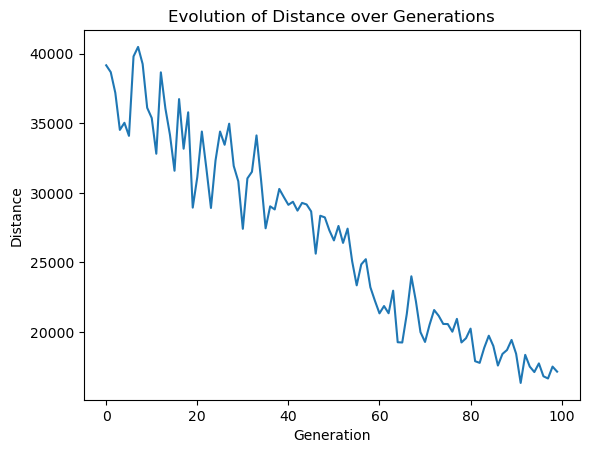

In [8]:
def genetic_algorithm(problem, generations, population_size, mutation_rate):
    cities = list(problem.get_nodes())
    population = initial_population(population_size, cities)
    best_distances = []

    for generation in range(generations):
        new_population = []
        gen_best_distance = float('inf')

        for _ in range(len(population) // 2):  # Assume population size is even
            parent1 = roulette_wheel_selection(population, lambda tour: fitness(tour, problem))
            parent2 = roulette_wheel_selection(population, lambda tour: fitness(tour, problem))
            child1, child2 = uniform_crossover(parent1, parent2)
            child1 = inversion_mutation(child1)
            child2 = inversion_mutation(child2)
            new_population.extend([child1, child2])

            for child in [child1, child2]:
                distance = calculate_distance(child, problem)
                if distance < gen_best_distance:
                    gen_best_distance = distance

        population = new_population
        best_distances.append(gen_best_distance)

    best_solution = min(population, key=lambda tour: calculate_distance(tour, problem))

    return best_solution, best_distances

# Example usage
best_tour, best_distances = genetic_algorithm(problem, 100, 50, 0.01)

# Plot the evolution of the best distance
plt.plot(best_distances)
plt.title('Evolution of Distance over Generations')
plt.xlabel('Generation')
plt.ylabel('Distance')
plt.show()